In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [59]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject/AssaultedOfficerData.csv")

In [60]:
data.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LEOKA_APPLIES,OFFICER_KILLED,TYPE_OF_ASSIGNMENT,TYPE_OF_ACTIVITY,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,OFFENSE_CITY,OFFENSE_ZIP
0,80-15-012103,2015-02-15 19:47:00,2015-02-14 21:40:00,ASSAULT,ASSAULT - 1ST DEGREE,YES,NO,ONE-MAN VEHICLE ALONE (UNIFORMED OFFICER) ...,TRAFFIC PURSUIT OR STOPS ...,13A,PART I,COMPLETED,4TH DIVISION,423,HIGHWAY / ROAD / ALLEY,CARLISLE AVE / WOODRUFF AVE ...,LOUISVILLE,40215.0
1,80-17-024937,2017-03-28 19:54:00,2017-03-28 19:54:00,HOMICIDE,MURDER POLICE OFFICER,YES,YES,ONE-MAN VEHICLE ALONE (UNIFORMED OFFICER) ...,TRAFFIC PURSUIT OR STOPS ...,09A,PART I,COMPLETED,1ST DIVISION,111,HIGHWAY / ROAD / ALLEY,N 26TH ST / DUNCAN ST ...,LOUISVILLE,40212.0
2,80-16-036554,2016-04-30 17:58:00,2016-04-30 15:00:00,ASSAULT,ASSAULT - 1ST DEGREE,YES,NO,TWO-MAN VEHICLE (UNIFORMED OFFICER) ...,ATTEMPTING OTHER ARREST ...,13A,PART I,COMPLETED,1ST DIVISION,135,HIGHWAY / ROAD / ALLEY,200 BLOCK E CHESTNUT ST ...,LOUISVILLE,40202.0
3,80-16-036554,2016-04-30 17:58:00,2016-04-30 15:00:00,ASSAULT,ASSAULT - 1ST DEGREE,YES,NO,TWO-MAN VEHICLE (UNIFORMED OFFICER) ...,ATTEMPTING OTHER ARREST ...,13A,PART I,COMPLETED,1ST DIVISION,135,HIGHWAY / ROAD / ALLEY,200 BLOCK E CHESTNUT ST ...,LOUISVILLE,40202.0
4,80-18-100369,2018-12-24 15:00:00,2018-12-24 14:17:00,HOMICIDE,MURDER POLICE OFFICER,YES,YES,ONE-MAN VEHICLE ALONE (UNIFORMED OFFICER) ...,TRAFFIC PURSUIT OR STOPS ...,09A,PART I,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,N 3RD ST / I 64 RAMP ...,LOUISVILLE,40202.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INCIDENT_NUMBER     7069 non-null   object 
 1   DATE_REPORTED       7069 non-null   object 
 2   DATE_OCCURED        7069 non-null   object 
 3   CRIME_TYPE          7069 non-null   object 
 4   UOR_DESC            7069 non-null   object 
 5   LEOKA_APPLIES       7069 non-null   object 
 6   OFFICER_KILLED      7069 non-null   object 
 7   TYPE_OF_ASSIGNMENT  7068 non-null   object 
 8   TYPE_OF_ACTIVITY    7068 non-null   object 
 9   NIBRS_CODE          7069 non-null   object 
 10  UCR_HIERARCHY       7069 non-null   object 
 11  ATT_COMP            7056 non-null   object 
 12  LMPD_DIVISION       7069 non-null   object 
 13  LMPD_BEAT           7067 non-null   object 
 14  PREMISE_TYPE        7068 non-null   object 
 15  BLOCK_ADDRESS       7069 non-null   object 
 16  OFFENS

In [62]:
data.OFFENSE_ZIP.value_counts()

40202.0    858
40203.0    771
40211.0    623
40215.0    457
40212.0    388
40208.0    364
40210.0    336
40204.0    329
40214.0    325
40219.0    258
40216.0    249
40218.0    234
40272.0    210
40258.0    187
40213.0    158
40206.0    145
40217.0    131
40229.0    100
40205.0     99
40220.0     95
40207.0     92
40209.0     90
40241.0     68
40291.0     67
40118.0     64
40228.0     59
40243.0     43
40222.0     43
40245.0     42
40299.0     38
40223.0     36
40242.0     14
40059.0     10
40023.0      9
40056.0      3
40225.0      2
40177.0      1
Name: OFFENSE_ZIP, dtype: int64

In [63]:
data = data.drop(data[['DATE_REPORTED', 'DATE_OCCURED', 'UOR_DESC', 'UCR_HIERARCHY', 'ATT_COMP', 'NIBRS_CODE', 'LMPD_BEAT', 'BLOCK_ADDRESS', 'OFFENSE_ZIP']], axis = 1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INCIDENT_NUMBER     7069 non-null   object
 1   CRIME_TYPE          7069 non-null   object
 2   LEOKA_APPLIES       7069 non-null   object
 3   OFFICER_KILLED      7069 non-null   object
 4   TYPE_OF_ASSIGNMENT  7068 non-null   object
 5   TYPE_OF_ACTIVITY    7068 non-null   object
 6   LMPD_DIVISION       7069 non-null   object
 7   PREMISE_TYPE        7068 non-null   object
 8   OFFENSE_CITY        6999 non-null   object
dtypes: object(9)
memory usage: 497.2+ KB


In [65]:
data.columns

Index(['INCIDENT_NUMBER', 'CRIME_TYPE', 'LEOKA_APPLIES', 'OFFICER_KILLED',
       'TYPE_OF_ASSIGNMENT', 'TYPE_OF_ACTIVITY', 'LMPD_DIVISION',
       'PREMISE_TYPE', 'OFFENSE_CITY'],
      dtype='object')

In [66]:
data = pd.get_dummies(data[['INCIDENT_NUMBER', 'CRIME_TYPE', 'LEOKA_APPLIES', 'OFFICER_KILLED',
       'TYPE_OF_ASSIGNMENT', 'TYPE_OF_ACTIVITY', 'LMPD_DIVISION',
       'PREMISE_TYPE', 'OFFENSE_CITY']], drop_first = True)

In [72]:
data.OFFICER_KILLED_YES.value_counts()

0    7065
1       4
Name: OFFICER_KILLED_YES, dtype: int64

### Splitting Data into X and y

In [73]:
X = data.drop("OFFICER_KILLED_YES", axis = 1)
y = data.OFFICER_KILLED_YES

### train_test_split

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify = y) 

## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(random_state = 0)
logistic_regressor.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
logistic_regressor.score(X_train, y_train)

0.9994694960212201

In [78]:
logistic_regressor.score(X_test, y_test)

0.9992927864214993

### MSE AND MAE

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_lr = logistic_regressor.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error: ', mse_lr)
print('Mean absolute error: ', mae_lr)

Mean squared error:  0.0007072135785007072
Mean absolute error:  0.18033946251768035


### Model Validation

In [79]:
y_pred = logistic_regressor.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1413    0]
 [   1    0]]


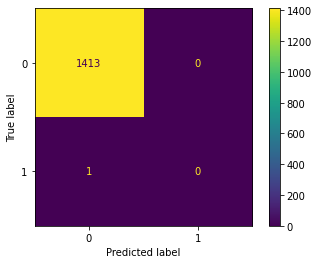

In [80]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_regressor.classes_)
display.plot()
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1414
   macro avg       0.50      0.50      0.50      1414
weighted avg       1.00      1.00      1.00      1414



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RFC

In [83]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 500)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [85]:
RFC.score(X_train, y_train)

1.0

In [84]:
RFC.score(X_test, y_test)

0.9992927864214993

### MSE AND MAE

In [86]:
y_pred_RF = RFC.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error: ', mse_RF)
print('Mean absolute error: ', mae_RF)

Mean squared error:  0.0007072135785007072
Mean absolute error:  0.18033946251768035


### Model Validation

In [87]:
y_pred = RFC.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1413    0]
 [   1    0]]


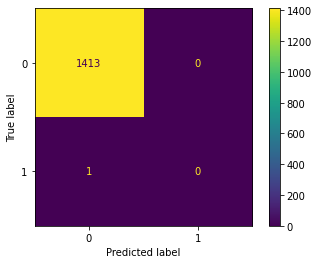

In [88]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = RFC.classes_)
display.plot()
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1414
   macro avg       0.50      0.50      0.50      1414
weighted avg       1.00      1.00      1.00      1414



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DT

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, random_state = 0)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

In [97]:
dt_gini.score(X_test, y_test)

1.0

In [98]:
dt_gini.score(X_train, y_train)

1.0

### MSE and MAE

In [99]:
mse_DT = mean_squared_error(y_test, y_pred_gini)
mae_DT = mean_absolute_error(y_test, y_pred_gini)
print('Mean squared error: ', mse_DT)
print('Mean absolute error: ', mae_DT)

Mean squared error:  0.0
Mean absolute error:  0.0


### Model Validation

In [101]:
y_pred = dt_gini.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1413    0]
 [   0    1]]


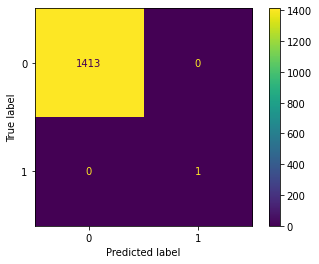

In [109]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt_gini.classes_)
display.plot()
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1414
   macro avg       1.00      1.00      1.00      1414
weighted avg       1.00      1.00      1.00      1414



## SVC

In [105]:
from sklearn.svm import SVC
SVC_model = SVC()

SVC_model.fit(X_train, y_train)

SVC()

In [107]:
SVC_model.score(X_train, y_train)

0.9994694960212201

In [106]:
SVC_model.score(X_test, y_test)

0.9992927864214993

### MSE and MAE

In [108]:
y_pred_SVC = SVC_model.predict(X_test)

mse_SVC = mean_squared_error(y_test, y_pred_SVC)
mae_SVC = mean_absolute_error(y_test, y_pred_SVC)
print('Mean squared error: ', mse_SVC)
print('Mean absolute error: ', mae_SVC)

Mean squared error:  0.0007072135785007072
Mean absolute error:  0.18033946251768035


### Model Validation

In [110]:
y_pred = SVC_model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1413    0]
 [   1    0]]


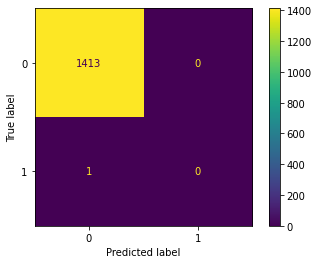

In [111]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVC_model.classes_)
display.plot()
plt.show()

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1414
   macro avg       0.50      0.50      0.50      1414
weighted avg       1.00      1.00      1.00      1414



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ANN

In [113]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [114]:
n_cols = X_train.shape[1]


ann = Sequential()

ann.add(Dense(150, activation='relu', input_shape=(n_cols,)))
ann.add(Dense(150, activation='relu'))
ann.add(Dense(150, activation='relu'))
ann.add(Dense(150, activation='relu'))
ann.add(Dense(150, activation='relu'))
ann.add(Dense(1))


ann.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [116]:
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
142/142 [==============================] - 2s 11ms/step - loss: 4.5142e-04 - mae: 0.0019 - val_loss: 8.8219e-04 - val_mae: 0.0011
Epoch 2/50
142/142 [==============================] - 1s 9ms/step - loss: 4.4027e-04 - mae: 0.0019 - val_loss: 8.8127e-04 - val_mae: 0.0013
Epoch 3/50
142/142 [==============================] - 1s 9ms/step - loss: 4.0208e-04 - mae: 0.0020 - val_loss: 8.8481e-04 - val_mae: 0.0014
Epoch 4/50
142/142 [==============================] - 1s 9ms/step - loss: 4.5096e-04 - mae: 0.0019 - val_loss: 8.9365e-04 - val_mae: 0.0055
Epoch 5/50
142/142 [==============================] - 1s 9ms/step - loss: 4.4405e-04 - mae: 0.0024 - val_loss: 8.8082e-04 - val_mae: 0.0018
Epoch 6/50
142/142 [==============================] - 1s 9ms/step - loss: 4.4096e-04 - mae: 0.0022 - val_loss: 8.8062e-04 - val_mae: 0.0013
Epoch 7/50
142/142 [==============================] - 1s 9ms/step - loss: 3.9422e-04 - mae: 0.0022 - val_loss: 8.7853e-04 - val_mae: 0.0016
Epoch 8/50
142/142 

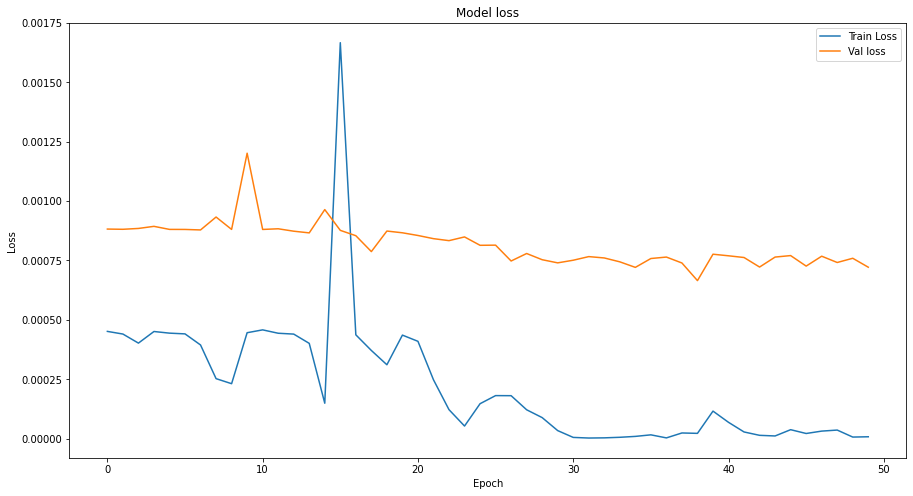

In [117]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Loss') #MSE
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

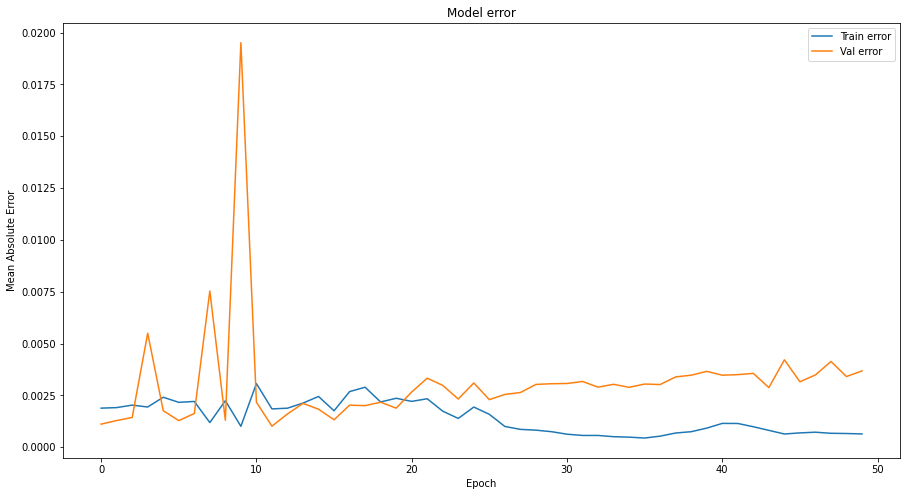

In [118]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(history.epoch, history.history['mae'],
           label='Train error')
plt.plot(history.epoch, history.history['val_mae'],
           label = 'Val error')
plt.title('Model error')
plt.legend()

In [136]:
score = ann.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0]) #MSE
print('Mean absolute error: ', score[1])

45/45 [==============================] - 1s 11ms/step - loss: 1.3968e-04 - mae: 0.0032
loss value:  0.00013967537961434573
Mean absolute error:  0.0032317908480763435


### Model Validation

In [124]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

45/45 [==============================] - 0s 6ms/step


In [125]:
confusion_matrix(y_test, y_pred)

array([[1413,    0],
       [   0,    1]])

In [128]:
print(classification_report(y_test, y_pred))
ann_score = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1413
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1414
   macro avg       1.00      1.00      1.00      1414
weighted avg       1.00      1.00      1.00      1414



## Pretty Table

In [140]:
from prettytable import PrettyTable

In [141]:
myTable = PrettyTable(["Model", "Training_score", "Test_score", "MAE", "MSE"])

In [142]:
myTable.add_row(["Logistic Regression", logistic_regressor.score(X_train, y_train), logistic_regressor.score(X_test, y_test), mae_lr, mse_lr])
myTable.add_row(["Random Forest Classifier", RFC.score(X_train, y_train), RFC.score(X_test, y_test), mae_RF, mse_RF])
myTable.add_row(["Decision Tree w/ Gini", dt_gini.score(X_train, y_train), dt_gini.score(X_test, y_test), mae_DT, mse_DT])
myTable.add_row(["SVC", SVC_model.score(X_train, y_train), SVC_model.score(X_test, y_test), mae_SVC, mse_SVC])
myTable.add_row(["ANN", ann_score, ann_score, score[1], "N/a"])

In [143]:
print(myTable)

+--------------------------+--------------------+--------------------+-----------------------+-----------------------+
|          Model           |   Training_score   |     Test_score     |          MAE          |          MSE          |
+--------------------------+--------------------+--------------------+-----------------------+-----------------------+
|   Logistic Regression    | 0.9994694960212201 | 0.9992927864214993 |  0.18033946251768035  | 0.0007072135785007072 |
| Random Forest Classifier |        1.0         | 0.9992927864214993 |  0.18033946251768035  | 0.0007072135785007072 |
|  Decision Tree w/ Gini   |        1.0         |        1.0         |          0.0          |          0.0          |
|           SVC            | 0.9994694960212201 | 0.9992927864214993 |  0.18033946251768035  | 0.0007072135785007072 |
|           ANN            |        1.0         |        1.0         | 0.0032317908480763435 |          N/a          |
+--------------------------+--------------------